In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline 
%matplotlib widget


# SIR Model

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

S(t): are those susceptible but not yet infected with the disease (All - Confirmed).

I(t): is the number of infectious individuals (Confirmed - Recovered - Deaths).

R(t): are those individuals who have recovered from the disease and now have immunity to it (Recovered + Deaths [Maybe]).

\begin{align*}
{\dot S}(t) = \frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
{\dot I}(t) = \frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
{\dot R}(t) = \frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}

The SIR model describes the change in the population of each of these compartments in terms of two parameters, $\beta $ and $\gamma $.  $\beta $ describes the effective contact rate of the disease: an infected individual comes into contact with  $\beta N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $S/N$). $\gamma $ is the mean recovery rate: that is, $1/\gamma$ is the mean period of time during which an infected individual can pass it on.

https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

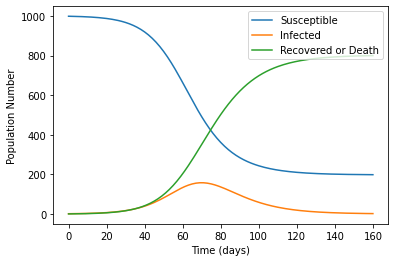

In [2]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Initial conditions vector
Initialval = [S0, I0, R0]

# Beta : Contact rate, Gamma: mean recovery rate (in 1/days).
beta, gamma = 0.2, 1./10 
params = [beta, gamma, N]
# A grid of time points (in days)
# time = np.linspace(0, 160, 161)


def SIR_ODE(Initialval, params, days):
    """
    Initialval(list): Is the initial condition, such that S = Initialval[0], I = Initialval[1], R = Initialval[2]
    time: is the time interval for solution based on days
    params(list): Is the parameters of the ODE, i.e. beta = params[0], gamma = params[2], N = params[2]
    """
    # Initial conditions vector
    S, I, R = [Initialval[0]], [Initialval[1]], [Initialval[2]]
    # Parameters
    beta, gamma, N = params[0], params[1], params[2]
    # Simulation of differential equaiton using Numerical differentiation
    # dx/dt = (x[t] - x[t-1])/dt
    # E.g. S[t] = S[t-1] + dt *(B*S*I/N)  dt = 1 # In our simulation dt is 1-day
    for _ in range(days):
        term1 = (beta/N) * S[-1] * I[-1]
        term2 = gamma * I[-1]
        S.append(S[-1] - term1)
        I.append(I[-1] + term1 - term2)
        R.append(R[-1] + term2)
    return np.array(S), np.array(I), np.array(R)

S, I, R = SIR_ODE(Initialval, params, 160)

# Plot the data on three separate curves for S(t), I(t) and R(t)
def plot_SIR(S, I, R):
    fig, ax = plt.subplots();
    ax.plot(S, label='Susceptible');
    ax.plot(I, label='Infected');
    ax.plot(R, label='Recovered or Death');
    ax.set_xlabel('Time (days)');
    ax.set_ylabel('Population Number');
    ax.legend(loc='upper right');
plot_SIR(S, I, R)
# del beta, gamma

# Get the Data from John Hopkins 


In [156]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

Cases = pd.read_csv(url+'time_series_covid19_confirmed_global.csv')
Deaths = pd.read_csv(url+'time_series_covid19_deaths_global.csv')
Recovered = pd.read_csv(url+'time_series_covid19_recovered_global.csv')
Cases.shape, Deaths.shape, Recovered.shape

((258, 76), (258, 76), (244, 76))

In [161]:
ind_country = (Deaths['Country/Region'] == 'Netherlands')
ind_nl = (Cases['Province/State'].isna())
Cases_NL = Cases[ind_country & ind_nl]
Deaths_NL = Deaths[ind_country & ind_nl]
Recovered_NL = Recovered[ind_country & ind_nl]

/Users/danial/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [163]:
# Modify the time index
from datetime import datetime

NL = {'Date': list(), 'Cases': list(), 'Deaths': list(),'Recovered': list() }
NL['Date'] = [datetime.strptime(date, '%m/%d/%y') for  date in Cases_NL.loc[:, '1/22/20':].columns]
NL['Cases'] = Cases_NL.loc[:, '1/22/20':].values[0]
NL['Deaths'] = Deaths_NL.loc[:, '1/22/20':].values[0]
NL['Recovered'] = Recovered_NL.loc[:, '1/22/20':].values[0]
NL = pd.DataFrame(NL)
NL.index = NL.Date 

In [203]:
NL

,Date,Cases,Deaths,Recovered
Date,,,,
2020-02-27,2020-02-27,1,0,0
2020-02-28,2020-02-28,1,0,0
2020-02-29,2020-02-29,6,0,0
2020-03-01,2020-03-01,10,0,0
2020-03-02,2020-03-02,18,0,0
2020-03-03,2020-03-03,24,0,0
2020-03-04,2020-03-04,38,0,0
2020-03-05,2020-03-05,82,0,0
2020-03-06,2020-03-06,128,1,0


In [199]:
# start based on # of cases!
NL = NL[NL.Cases>0] 
Start_Epidemy = NL[NL.Cases>=0]['Date'][0]
I_data = NL['Cases'].values
R_data = (NL.Deaths+ NL.Recovered).values

# Cost Function

In [165]:
def errorRMSE(I, R, I_data, R_data):
    """
    We need to minimize the difference of the observed values and estimated values. 
    This function calculate the difference of the estimated value and obsereved value.
    """
    Square_Error = (I-I_data)**2 + (R-R_data)**2
    return np.sqrt(Square_Error.sum())/(I_data.shape[0])
    

# Optimization with Optuna

In [179]:
import optuna

def objective(trial):
    
    # Total population in Netherlands.
    N = 17180000 
    # Initial number of infected and recovered individuals, I0 and R0.
    I0, R0 = 1, 0
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - R0
    
    # Parameters
    beta = trial.suggest_uniform('beta', 0, 1)
#     gamma = 1/15
    gamma = trial.suggest_uniform('gamma', 0, 1)
    
    
    # Solve the differential Equation:
    Initialval = [S0, I0, R0]
    params = [beta, gamma, N]
    days = NL.shape[0] 
    S, I, R = SIR_ODE(Initialval, params, days-1) # we should get days -1, as counting starts from 0
    return float(errorRMSE(I, R, I_data, R_data))


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
trial = study.best_trial
beta = trial.params['beta']
# gamma = 1/15
gamma = trial.params['gamma']
print('Error: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
print(f'Mean period of time during which an infected individual can pass it on is around {int(1/gamma)} days [1/gamma] ', )

[I 2020-04-03 12:33:57,305] Finished trial#0 with value: 962.543458010326 with parameters: {'beta': 0.030204301130104527, 'gamma': 0.8572478888074837}. Best is trial#0 with value: 962.543458010326.
[I 2020-04-03 12:33:57,434] Finished trial#1 with value: 962.5410249304324 with parameters: {'beta': 0.2521707991386838, 'gamma': 0.8792209119972785}. Best is trial#1 with value: 962.5410249304324.
[I 2020-04-03 12:33:57,562] Finished trial#2 with value: 962.0654758514486 with parameters: {'beta': 0.14915572212583494, 'gamma': 0.09948479585716763}. Best is trial#2 with value: 962.0654758514486.
[I 2020-04-03 12:33:57,678] Finished trial#3 with value: 962.53764299576 with parameters: {'beta': 0.39698187989559186, 'gamma': 0.8332568313042363}. Best is trial#2 with value: 962.0654758514486.
[I 2020-04-03 12:33:57,790] Finished trial#4 with value: 444465.3845867863 with parameters: {'beta': 0.738409249588398, 'gamma': 0.1096475802589506}. Best is trial#2 with value: 962.0654758514486.
[I 2020-04

Error: 438.43628444434097
Best hyperparameters: {'beta': 0.41179765824185877, 'gamma': 0.08671705000003513}
Mean period of time during which an infected individual can pass it on is around 11 days [1/gamma] 


# Predict the Outbreak

In [197]:
from datetime import timedelta  
plt.close('all')

# Total population in Netherlands.
N = 17000000 
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Optimization Parameters
trial = study.best_trial
beta = trial.params['beta']
gamma = trial.params['gamma'] 
# gamma =1/15 

Initialval = [S0, I0, R0]
params = [beta, gamma, N]
days = 300
S, I, R = SIR_ODE(Initialval, params, days)

plot_SIR(S, I, R)

# Interpret the results
max_Infected = int(max(I))
pick_of_I = np.where(np.array(I) >=max_Infected)[0][0]
Pick_Epidemy = Start_Epidemy.date() + timedelta(days=int(pick_of_I)) 
End_of_I = np.where(np.array(I) < 1)[0][0]
End_Epidemy = Start_Epidemy.date() + timedelta(days=int(End_of_I))  
print('Epidemy Start Date:', Start_Epidemy.date())
print('Epidemy Pick Date:', Pick_Epidemy)
print('Epidemy End Date:', End_Epidemy)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Epidemy Start Date: 2020-02-27
Epidemy Pick Date: 2020-04-30
Epidemy End Date: 2020-11-03


In [ ]:
Scale the S, I, R